In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
df = pd.read_csv(r"C:\Users\prade\OneDrive\Documents\Data Science using Python\archive (4)\Emissions Vehicles.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [45]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [46]:
df.drop(['Make', 'Model', 'Vehicle Class',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'], axis = 1, inplace = True)

In [47]:
df.columns

Index(['Engine Size(L)', 'Cylinders', 'CO2 Emissions(g/km)'], dtype='object')

In [48]:
df

,Engine Size(L),Cylinders,CO2 Emissions(g/km)
0,2.0,4,196
1,2.4,4,221
2,1.5,4,136
3,3.5,6,255
4,3.5,6,244
...,...,...,...
7380,2.0,4,219
7381,2.0,4,232
7382,2.0,4,240
7383,2.0,4,232


In [49]:
df.isnull().sum()

Engine Size(L)         0
Cylinders              0
CO2 Emissions(g/km)    0
dtype: int64

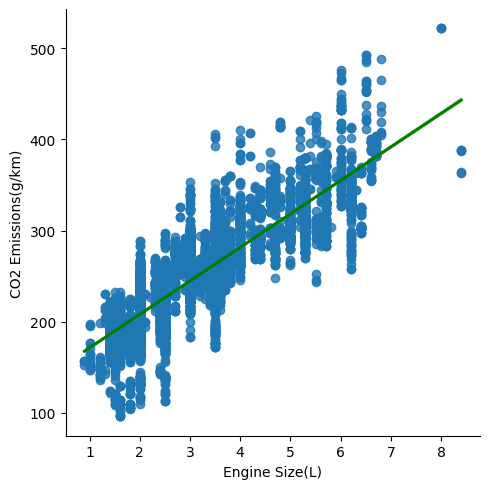

In [50]:
lm = sns.lmplot(x = "Engine Size(L)", y = "CO2 Emissions(g/km)", data = df, line_kws={'color':'green'})

In [51]:
x_bar=df["Engine Size(L)"].mean()
y_bar=df["CO2 Emissions(g/km)"].mean()
y_bar,x_bar

(np.float64(250.58469871360867), np.float64(3.160067704807041))

In [52]:
df["numerator"]=(df["Engine Size(L)"]-x_bar)*(df["CO2 Emissions(g/km)"]-y_bar)
df

,Engine Size(L),Cylinders,CO2 Emissions(g/km),numerator
0,2.0,4,196,63.321946
1,2.4,4,221,22.486374
2,1.5,4,136,190.218358
3,3.5,6,255,1.500904
4,3.5,6,244,-2.238352
...,...,...,...,...
7380,2.0,4,219,36.640389
7381,2.0,4,232,21.559509
7382,2.0,4,240,12.278967
7383,2.0,4,232,21.559509


In [53]:
df["denominator"]=(df["Engine Size(L)"])**2
df

,Engine Size(L),Cylinders,CO2 Emissions(g/km),numerator,denominator
0,2.0,4,196,63.321946,4.00
1,2.4,4,221,22.486374,5.76
2,1.5,4,136,190.218358,2.25
3,3.5,6,255,1.500904,12.25
4,3.5,6,244,-2.238352,12.25
...,...,...,...,...,...
7380,2.0,4,219,36.640389,4.00
7381,2.0,4,232,21.559509,4.00
7382,2.0,4,240,12.278967,4.00
7383,2.0,4,232,21.559509,4.00


In [54]:
theta1=df['numerator'].sum()/df['denominator'].sum()
theta1

np.float64(5.705144803216719)

In [55]:
theta0=y_bar-(theta1*x_bar)
theta0

np.float64(232.5560548697158)